1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [35]:
# poisson, mean = 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [48]:
stats.poisson(2).pmf(0)

#a

0.1353352832366127

In [47]:
#simulation
mean = 2 
target = 0
nrows = 100_000
ncols = 1

rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols)

df = pd.DataFrame(rolls)
df.head()

,0
0,0
1,2
2,2
3,2
4,6


In [49]:
df[0] == target

0         True
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: 0, Length: 100000, dtype: bool

In [5]:
stats.poisson(2).sf(2)
#b

0.32332358381693654

In [50]:
#simulation
mean = 2
target = 3
stats.poisson(mean).sf(target -1)

0.32332358381693654

In [51]:

nrows = 100_000
ncols = 1

rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols)

df = pd.DataFrame(rolls)
df.head()

df['zero_cars'] = df[0] >= target
df.head()

,0,zero_cars
0,3,True
1,1,False
2,3,True
3,4,True
4,1,False


In [6]:
1 - stats.poisson(2).pmf(0)
#c

0.8646647167633873

In [7]:
stats.poisson(2).sf(0)
#c same answer as before but different approach

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [8]:
# mean = 3.0 std = .3 normal distribution
grades = stats.norm(3, .3)
grades.ppf(.95)
#a

3.4934560880854417

In [52]:
grades.isf(.05)

3.4934560880854417

In [53]:
grades.quantile(.95).values

AttributeError: 'rv_frozen' object has no attribute 'quantile'

In [9]:
#b
grades.ppf(.15)

2.689069983151863

In [10]:
#c range for 3rd decile is between .2 and .299
grades.ppf(.299) - grades.ppf(.2)
#deviation

0.09430273264002187

In [54]:
end = grades.ppf(.299)
end

2.8418163625681476

In [55]:
start = grades.ppf(.2)
start

2.7475136299281258

In [57]:
# range would be 2.747 - 2.842
# A student with a 2.8 GPA would qualify for the scholarship
print(f'The range of the third decile is from {round(start, 2)} to {round(end, 2)}')


The range of the third decile is from 2.75 to 2.84


In [59]:
grades.cdf(3.5)
# With a 3.5 you'd be in the top 5%

0.9522096477271853

In [60]:
percentile = round(grades.cdf(3.5), 2)
print(f'You are in the {percentile}th percentile')

You are in the 0.95th percentile


3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [16]:
# mean = .02  97/4326 = 0.0224
stats.binom(4326, .02).sf(97)

0.11781530585907925

In [62]:
prob_success = .02
n_trials = 4326

target_success = 97
stats.binom(n_trials, prob_success).sf(target_success-1)

0.1397582363130086

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.



- What is the probability that at least one of your first 60 answers is correct?

In [18]:
stats.binom(60, 0.01).sf(0)

0.4528433576092388

In [19]:
stats.binom(100, 0.01).cdf(60)
#Wrong answer. This looks at 100 trials.

0.9999999999999999

In [63]:
prob_success = .01
n_trials = 60
desired_successes = 1

stats.binom(n_trials, prob_success).sf(desired_successes-1)

0.4528433576092388

In [68]:
nrows = 100_000
ncols = 60

rolls = np.random.choice([True, False], nrows * ncols, p=[.01, .99]).reshape(nrows, ncols)

df = pd.DataFrame(rolls)
df.head()

df['correct'] = df.sum(axis=1) > 0
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,correct
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [69]:
df['correct'].mean()

0.4515

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [70]:
prob_success = 0.03
n_trials = (22 * 3) * .9

desired_success = 1

stats.binom(n_trials, prob_success).sf(desired_success-1)

0.8342199288437355

# simulation

In [72]:
nrows = 100_000
ncols = 1

rolls = np.random.binomial(n_trials,prob_success, nrows * ncols).reshape(nrows, ncols)

df = pd.DataFrame(rolls)
df.head()

df['clean'] = df.sum(axis=1) > 0
df.head()

,0,clean
0,1,True
1,1,True
2,2,True
3,0,False
4,1,True


In [73]:
df.clean.mean()

0.83329

In [20]:
# probability of student cleaning = .03 66*.9 = 59.4 = 60 students
stats.binom(60, 0.03).sf(0)

0.8391933309784234

In [74]:
#one day without cleaning
1 - df.clean.mean()

0.16671000000000002

In [22]:
stats.binom(60, 0.03).cdf(0)**2
# likeliness of it not getting cleaned 2 days in a row

0.025858784801814878

# Dirty simulation

In [76]:
nrows = 100_000
ncols = 2

rolls = np.random.binomial(n_trials,prob_success, nrows * ncols).reshape(nrows, ncols)

df = pd.DataFrame(rolls)
df.head()

df['dirty'] = df.sum(axis=1) == 0
df.head()

,0,1,dirty
0,1,2,False
1,2,0,False
2,2,2,False
3,2,3,False
4,1,1,False


In [77]:
df.dirty.mean()

0.02741

In [23]:
stats.binom(60, 0.03).cdf(0)**5
# likeliness of it not getting cleaned 5 days in a row

0.00010752768104907583

# All Week

In [78]:
nrows = 100_000
ncols = 5

rolls = np.random.binomial(n_trials,prob_success, nrows * ncols).reshape(nrows, ncols)

df = pd.DataFrame(rolls)
df.head()

df['dirty'] = df.sum(axis=1) == 0
df.head()

,0,1,2,3,4,dirty
0,4,0,1,1,2,False
1,1,1,1,1,0,False
2,2,1,1,2,1,False
3,1,2,2,1,2,False
4,2,1,0,0,4,False


In [79]:
df.dirty.mean()

0.00012

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [84]:
# mean = 15 and std = 3 2min per person  and  10 min to get food. 1 hour for lunch. 
# What is the likelihood of having at least 15 min left over?

# common situation
people = 15
order = 2
get_food = 10
on_average = 60 - (people * order) - get_food - order
on_average

18

In [85]:
normal = stats.norm(people, 3)
normal

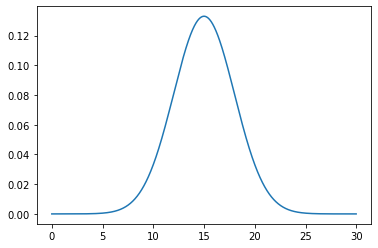

In [28]:
x_axis = np.arange(-0, 30, 0.01)
  
# Calculating mean and standard deviation
mean = 15
sd = 3
  
plt.plot(x_axis, stats.norm.pdf(x_axis, mean, sd))
plt.show()

In [87]:
# there can be no more than 16 people present or else I will have less than 15 min to enjoy my lunch.
normal.cdf(17.5)

0.7976716190363569

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



- What percent of employees earn less than 60,000?


In [37]:
from env import host, user, password
def get_db_url(database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url
employees = pd.read_sql('SELECT * FROM employees', get_db_url('employees'))
employees.head()


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [40]:
len(employees)

300024

In [88]:
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date = "9999-01-01"', get_db_url('employees'))
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [89]:
mean = salaries.salary.mean()
mean

72012.23585730705

In [90]:
sd = salaries.salary.std()
sd

17309.99538025198

In [91]:
(salaries.salary < 60000).mean()

0.2705727041028802

- What percent of employees earn more than 95,000?


In [92]:
(salaries.salary > 95000).mean()

0.1086272092752078

- What percent of employees earn between 65,000 and 80,000?


In [94]:
((salaries.salary > 65000) & (salaries.salary < 80000)).mean()

0.325107028035515

- What do the top 5% of employees make?

In [95]:
stats.norm(mean, sd).isf(0.05)

100484.64454102777